|\
|
#### It is recommended to run this on Google Colab. Otherwise, if you are running it locally, to save time, change the path of the CSV files if you want to use them from your local storage before running the code below.
                                                    --------------
                                                                    -----------------

### CSV Files Paths

In [1]:
fuelDensity = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelDensity.csv"
fuelTemp = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelTemp.csv"
fuelVolumeFlowRate = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelVolumeFlowRate.csv"
inclinometer = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/inclinometer-raw.csv"
speedKnots = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/speedKnots.csv"
speedKmh = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/speedKmh.csv"
windSpeed = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/windSpeed.csv"
portPitch = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/portPitch.csv"
starboardPitch = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/starboardPitch.csv"
portRudder = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/portRudder.csv"
starboardRudder = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/starboardRudder.csv"
latitude = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/latitude.csv"
longitude = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/longitude.csv"
windAngle = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/windAngle.csv"
trueHeading = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/trueHeading.csv"
trackDegreeTrue = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/trackDegreeTrue.csv"
trackDegreeMagnetic = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/trackDegreeMagnetic.csv"
longitudinalWaterSpeed = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/longitudinalWaterSpeed.csv"
level1median = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/level1median.csv"
level2median = "https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/level2median.csv"

### Package Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np


from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import re


### Data Inspection

In [3]:
fuel_density = pd.read_csv(fuelDensity, header = None, names=["Timestamp", "FuelDensity"])
fuel_density.head()

,Timestamp,FuelDensity
0,634019142119225390,0.947109
1,634019142129597610,0.947110
2,634019142139821660,0.947114
3,634019142150036040,0.947104
4,634019212935606850,0.938305


In [4]:
fuel_density.isna().sum()

Timestamp      0
FuelDensity    0
dtype: int64

In [5]:
fuel_density.shape

(1627324, 2)

In [6]:
fuel_temp= pd.read_csv(fuelTemp, header = None, names=["Timestamp", "FuelTemp"])
fuel_temp.head()

,Timestamp,FuelTemp
0,634019142119225390,62.20651
1,634019142129597610,62.20406
2,634019142139821660,62.19989
3,634019142150036040,62.20412
4,634019212935606850,86.89216


In [7]:
fuel_temp.isna().sum()

Timestamp    0
FuelTemp     0
dtype: int64

In [8]:
fuel_temp.shape

(1627324, 2)

In [9]:
fuel_flow_rate = pd.read_csv(fuelVolumeFlowRate, header = None, names=["Timestamp", "FuelVolumeFlowRate"])
fuel_flow_rate.head()

,Timestamp,FuelVolumeFlowRate
0,634019142119225390,0.000000
1,634019142129597610,0.000000
2,634019142139821660,0.000000
3,634019142150036040,0.000000
4,634019212935606850,0.283816


In [10]:
fuel_flow_rate.isna().sum()

Timestamp             0
FuelVolumeFlowRate    0
dtype: int64

In [11]:
fuel_flow_rate.shape

(1627324, 2)

In [12]:
inclinometer_df = pd.read_csv(inclinometer, header = None, names=["Timestamp", "Inclinometer"])
inclinometer_df.head()

,Timestamp,Inclinometer
0,634018095130928380,357.25
1,634018095135792430,357.26
2,634018095140650320,357.26
3,634018095145505050,357.26
4,634018095150362220,357.26


In [13]:
inclinometer_df.isna().sum()

Timestamp       0
Inclinometer    0
dtype: int64

In [14]:
inclinometer_df.shape

(3559677, 2)

In [15]:
latitude_df = pd.read_csv(latitude, header = None, names=["Timestamp", "Latitude"])
latitude_df.head()

,Timestamp,Latitude
0,634018095137704470,6132.9236N
1,634018095137898920,6132.9236N
2,634018095146534160,6132.9240N
3,634018095157587450,6132.9243N
4,634018095158588070,6132.9243N


In [16]:
latitude_df.isna().sum()

Timestamp    0
Latitude     0
dtype: int64

In [17]:
latitude_df.shape

(2677713, 2)

In [18]:
level1_median = pd.read_csv(level1median, header = None, names=["Timestamp", "Level1Median"])
level1_median.head()

,Timestamp,Level1Median
0,634018095128184147,16.871168
1,634018095131517480,16.830462
2,634018095134850813,16.779580
3,634018095138184146,16.840639
4,634018095141517479,16.789757


In [19]:
level1_median.isna().sum()

Timestamp       0
Level1Median    0
dtype: int64

In [20]:
level1_median.shape

(3979774, 2)

In [21]:
level2_median = pd.read_csv(level2median, header = None, names=["Timestamp", "Level2Median"])
level2_median.head()

,Timestamp,Level2Median
0,634018095128184147,13.935757
1,634018095131517480,13.953643
2,634018095134850813,13.912760
3,634018095138184146,13.961308
4,634018095141517479,14.009856


In [22]:
level2_median.isna().sum()

Timestamp       0
Level2Median    0
dtype: int64

In [23]:
level2_median.shape

(3840794, 2)

In [24]:
longitude_df = pd.read_csv(longitude, header = None, names=["Timestamp", "Longitude"])
longitude_df.head()

,Timestamp,Longitude
0,634018095137704470,00649.1143W
1,634018095137898920,00649.1143W
2,634018095146534160,00649.1143W
3,634018095157587450,00649.1144W
4,634018095158588070,00649.1144W


In [25]:
longitude_df.isna().sum()

Timestamp    0
Longitude    0
dtype: int64

In [26]:
longitude_df.shape

(2677696, 2)

In [27]:
water_speed = pd.read_csv(longitudinalWaterSpeed, header = None, names=["Timestamp", "LongitudinalWaterSpeed"])
water_speed.head()

,Timestamp,LongitudinalWaterSpeed
0,634018095159676190,0.4
1,634018095189470370,0.5
2,634018095220320480,0.7
3,634018095251911580,0.9
4,634018095283323350,1.1


In [28]:
water_speed.isna().sum()

Timestamp                 0
LongitudinalWaterSpeed    0
dtype: int64

In [29]:
water_speed.shape

(548292, 2)

In [30]:
port_pitch = pd.read_csv(portPitch, header = None, names=["Timestamp", "PortPitch"])
port_pitch.head()

,Timestamp,PortPitch
0,634018095135582500,2.127
1,634018095145588030,2.156
2,634018095155594280,2.295
3,634018095165605510,2.446
4,634018095175611210,2.469


In [31]:
port_pitch.isna().sum()

Timestamp    0
PortPitch    0
dtype: int64

In [32]:
port_pitch.shape

(1726076, 2)

In [33]:
port_rudder = pd.read_csv(portRudder, header = None, names=["Timestamp", "PortRudder"])
port_rudder.head()

,Timestamp,PortRudder
0,634018095135582500,3.118
1,634018095145588030,3.153
2,634018095155594280,3.148
3,634018095165605510,3.225
4,634018095175611210,3.227


In [34]:
port_rudder.isna().sum()

Timestamp     0
PortRudder    0
dtype: int64

In [35]:
port_rudder.shape

(1726076, 2)

In [36]:
speed_kmh = pd.read_csv(speedKmh, header = None, names=["Timestamp", "SpeedKmh"])
speed_kmh.head()

,Timestamp,SpeedKmh
0,634018095130693130,1.1
1,634018095139168740,1.1
2,634018095149771410,1.3
3,634018095160296020,1.5
4,634018095160835260,1.5


In [37]:
speed_kmh.isna().sum()

Timestamp    0
SpeedKmh     0
dtype: int64

In [38]:
speed_kmh.shape

(1766906, 2)

In [39]:
speed_knots = pd.read_csv(speedKnots, header = None, names=["Timestamp", "SpeedKnots"])
speed_knots.head()

,Timestamp,SpeedKnots
0,634018095130693130,0.6
1,634018095139168740,0.6
2,634018095149771410,0.7
3,634018095160296020,0.8
4,634018095160835260,0.8


In [40]:
speed_knots.isna().sum()

Timestamp     0
SpeedKnots    0
dtype: int64

In [41]:
speed_knots.shape

(1766908, 2)

In [42]:
starboard_pitch = pd.read_csv(starboardPitch, header = None, names=["Timestamp", "StarboardPitch"])
starboard_pitch.head()

,Timestamp,StarboardPitch
0,634018095135582500,2.103
1,634018095145588030,2.067
2,634018095155594280,2.223
3,634018095165605510,2.331
4,634018095175611210,2.418


In [43]:
starboard_pitch.isna().sum()

Timestamp         0
StarboardPitch    0
dtype: int64

In [44]:
starboard_pitch.shape

(1726076, 2)

In [45]:
starboard_rudder = pd.read_csv(starboardRudder, header = None, names=["Timestamp", "StarboardRudder"])
starboard_rudder.head()

,Timestamp,StarboardRudder
0,634018095135582500,3.142
1,634018095145588030,3.200
2,634018095155594280,3.202
3,634018095165605510,3.076
4,634018095175611210,3.078


In [46]:
starboard_rudder.isna().sum()

Timestamp          0
StarboardRudder    0
dtype: int64

In [47]:
starboard_rudder.shape

(1726076, 2)

In [48]:
degree_magnetic = pd.read_csv(trackDegreeMagnetic, header = None, names=["Timestamp", "TrackDegreeMagnetic"])
degree_magnetic.head()

,Timestamp,TrackDegreeMagnetic
0,634018095139168740,48.5
1,634018095149771410,40.3
2,634018095160296020,33.2
3,634018095160835260,33.2
4,634018095179734830,22.0


In [49]:
degree_magnetic.isna().sum()

Timestamp              0
TrackDegreeMagnetic    0
dtype: int64

In [50]:
degree_magnetic.shape

(1766474, 2)

In [51]:
degree_true = pd.read_csv(trackDegreeTrue, header = None, names=["Timestamp", "TrackDegreeTrue"])
degree_true.head()

,Timestamp,TrackDegreeTrue
0,634018095139168740,41.5
1,634018095149771410,33.3
2,634018095160296020,26.2
3,634018095160835260,26.2
4,634018095179734830,15.0


In [52]:
degree_true.isna().sum()

Timestamp          0
TrackDegreeTrue    0
dtype: int64

In [53]:
degree_true.shape

(1766479, 2)

In [54]:
true_heading = pd.read_csv(trueHeading, header = None, names=["Timestamp", "TrueHeading"])
true_heading.head()

,Timestamp,TrueHeading
0,634018095140997220,317.93
1,634018095152989600,318.32
2,634018095164992880,318.83
3,634018095176985300,319.33
4,634018095188988420,319.77


In [55]:
true_heading.isna().sum()

Timestamp      0
TrueHeading    0
dtype: int64

In [56]:
true_heading.shape

(1439539, 2)

In [57]:
wind_angle = pd.read_csv(windAngle, header = None, names=["Timestamp", "WindAngle"])
wind_angle.head()

,Timestamp,WindAngle
0,634018095148473090,322
1,634018095168491190,330
2,634018095188489250,325
3,634018095208487470,328
4,634018095228465720,350


In [58]:
wind_angle.isna().sum()

Timestamp    0
WindAngle    0
dtype: int64

In [59]:
wind_angle.shape

(863755, 2)

In [60]:
wind_speed = pd.read_csv(windSpeed, header = None, names=["Timestamp", "WindSpeed"])
wind_speed.head()

,Timestamp,WindSpeed
0,634018095148473090,0.7
1,634018095168491190,0.7
2,634018095188489250,0.7
3,634018095208487470,0.7
4,634018095228465720,0.8


In [61]:
wind_speed.isna().sum()

Timestamp    0
WindSpeed    0
dtype: int64

In [62]:
wind_speed.shape

(863755, 2)

### Data Preprocessing

#### Convert .NET ticks to UTC datetime

In [63]:
# Conver the epoch time to UTC
def convert_dotnet_ticks(ticks):
    dotnet_epoch = datetime(1, 1, 1)
    unix_epoch = datetime(1970, 1, 1)
    elapsed_seconds = (ticks - 621355968000000000) / 10**7
    return unix_epoch + timedelta(seconds=elapsed_seconds)


#### Convert latitude from DDMM.MMMM format to decimal degrees

In [64]:
# Conver latitude into decimal values
def convert_latitude(lat_str):
    match = re.match(r"(\d{2,3})(\d{2}\.\d+)([NS])", lat_str)
    if not match: return None
    degrees = int(match.group(1))
    minutes = float(match.group(2))
    hemisphere = match.group(3)
    decimal = degrees + minutes/60
    return -decimal if hemisphere == 'N' else decimal

#### Convert longitude from DDDMM.MMMM format to decimal degrees

In [65]:
# Conver longitude into decimal values
def convert_longitude(lon_str):
    match = re.match(r"(\d{3})(\d{2}\.\d+)([EW])", lon_str)
    if not match: return None
    degrees = int(match.group(1))
    minutes = float(match.group(2))
    hemisphere = match.group(3)
    decimal = degrees + minutes/60
    return -decimal if hemisphere == 'W' else decimal

#### Calculate time-weighted average for irregularly sampled data.

In [66]:
def time_weighted_average(series, aggregation_period='h'):
    if series.empty:
        return np.nan
    
    series = series.sort_index()
    
    # Compute time differences in seconds
    deltas = series.index.to_series().diff().dt.total_seconds().iloc[1:]
    
    # Extend last delta to the aggregation boundary
    end_of_period = series.index[-1].ceil(aggregation_period)
    last_delta = (end_of_period - series.index[-1]).total_seconds()
    deltas = np.append(deltas.values, last_delta)
    
    # Compute weighted sum and total duration
    weighted_sum = np.nansum(series.values * deltas)
    total_duration = np.nansum(deltas)
    
    return weighted_sum / total_duration if total_duration > 0 else np.nan


#### Load and process sensor data

In [67]:
def load_and_process_sensor_data(filename, col_names, converter=None):
    df = pd.read_csv(filename, header=None, names=col_names)
    df['Timestamp'] = df['Timestamp'].apply(lambda x: convert_dotnet_ticks(int(x)))
    
    if converter:
        df[col_names[1]] = df[col_names[1]].apply(converter)
    
    df = df.set_index('Timestamp')
    
    # Use time-weighted average for FuelVolumeFlowRate, else mean
    if col_names[1] == 'FuelVolumeFlowRate':
        resampled = df.resample('h').apply(time_weighted_average)

    else:
        resampled = df.resample('h').mean()
    
    return resampled

### Data Processing

In [68]:
sensor_configs = [
    (fuelDensity, ["Timestamp", "FuelDensity"], None),
    (fuelTemp, ["Timestamp", "FuelTemp"], None),
    (fuelVolumeFlowRate, ["Timestamp", "FuelVolumeFlowRate"], None),
    (inclinometer, ["Timestamp", "Inclinometer"], None),
    (speedKnots, ["Timestamp", "SpeedKnots"], None),
    (speedKmh, ["Timestamp", "SpeedKmh"], None),
    (windSpeed, ["Timestamp", "WindSpeed"], None),
    (portPitch, ["Timestamp", "PortPitch"], None),
    (starboardPitch, ["Timestamp", "StarboardPitch"], None),
    (portRudder, ["Timestamp", "PortRudder"], None),
    (starboardRudder, ["Timestamp", "StarboardRudder"], None),
    (latitude, ["Timestamp", "Latitude"], convert_latitude),
    (longitude, ["Timestamp", "Longitude"], convert_longitude),
    (windAngle, ["Timestamp", "WindAngle"], None),
    (trueHeading, ["Timestamp", "TrueHeading"], None),
    (trackDegreeTrue, ["Timestamp", "DegreeTrue"], None),
    (trackDegreeMagnetic, ["Timestamp", "DegreeMagnetic"], None),
    (longitudinalWaterSpeed, ["Timestamp", "LongitudinalWaterSpeed"], None),
    (level1median, ["Timestamp", "Level1Median"], None),
    (level2median, ["Timestamp", "Level2Median"], None)
]


#### Process all sensor data


**NB: This block of code is estimated to take up to two minutes to run on Google Colab.**

In [69]:
# Process all sensor data
import time 

start_time = time.time()

dfs = {}
for config in sensor_configs:
    filename, cols, converter = config
    try:
        dfs[cols[1]] = load_and_process_sensor_data(filename, cols, converter)
        print(f"Processed {filename} successfully")
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

# Merge all dataframes
df = pd.concat(dfs.values(), axis=1)
df = df.iloc[29:]

end_time = time.time()

print(f"Total Time: {end_time - start_time:.2f} seconds\n")

print(f"Data Processing Completed Successfully!!")


Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelDensity.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelTemp.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/fuelVolumeFlowRate.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/inclinometer-raw.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/speedKnots.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/speedKmh.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/windSpeed.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/portPitch.csv successfully
Processed https://media.githubusercontent.com/media/tesfawel/MLData/refs/heads/main/starboardPi

In [70]:
df.head()

,FuelDensity,FuelTemp,FuelVolumeFlowRate,Inclinometer,SpeedKnots,SpeedKmh,WindSpeed,PortPitch,StarboardPitch,PortRudder,StarboardRudder,Latitude,Longitude,WindAngle,TrueHeading,DegreeTrue,DegreeMagnetic,LongitudinalWaterSpeed,Level1Median,Level2Median
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-02-16 10:00:00,0.947109,62.203645,0.000000,NaN,0.000000,0.000000,11.866667,-0.039667,-0.035833,0.087417,-0.050333,-62.007281,-6.765451,246.666667,163.925000,353.000000,0.200000,0.000000,15.638121,NaN
2010-02-16 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-16 12:00:00,0.931464,92.897298,0.470636,357.345570,15.024862,27.826796,20.444633,5.747796,7.078122,-0.277101,0.073891,-61.992134,-6.745631,285.118644,162.164754,156.702905,163.902905,13.678667,17.178958,14.203450
2010-02-16 13:00:00,0.926195,97.423365,0.501745,357.232369,19.365727,35.861903,13.689500,6.942320,8.181388,-0.106311,-0.125639,-61.884970,-6.879387,216.812222,215.339870,204.731508,211.851817,18.157968,17.043781,14.458455
2010-02-16 14:00:00,0.925123,98.076956,0.499402,357.258047,15.843385,29.342679,17.630444,6.588657,7.872375,-0.192681,-0.211416,-61.648317,-6.779153,298.276111,169.736120,160.323309,167.423309,16.765092,16.891017,14.075201


In [71]:
print("\nMissing Values Summary:")
print(df.isna().sum())


Missing Values Summary:
FuelDensity               645
FuelTemp                  645
FuelVolumeFlowRate        645
Inclinometer              644
SpeedKnots                641
SpeedKmh                  641
WindSpeed                 641
PortPitch                 643
StarboardPitch            643
PortRudder                643
StarboardRudder           643
Latitude                  641
Longitude                 641
WindAngle                 641
TrueHeading               641
DegreeTrue                641
DegreeMagnetic            641
LongitudinalWaterSpeed    641
Level1Median              641
Level2Median              644
dtype: int64


In [72]:
df.shape

(1333, 20)

#### Handling Missing Values

In [73]:
# Forward fill
df = df.ffill()

# Backward fill to fill any remaining NaNs at the beginning
df = df.bfill()


In [74]:
df.isna().sum()

FuelDensity               0
FuelTemp                  0
FuelVolumeFlowRate        0
Inclinometer              0
SpeedKnots                0
SpeedKmh                  0
WindSpeed                 0
PortPitch                 0
StarboardPitch            0
PortRudder                0
StarboardRudder           0
Latitude                  0
Longitude                 0
WindAngle                 0
TrueHeading               0
DegreeTrue                0
DegreeMagnetic            0
LongitudinalWaterSpeed    0
Level1Median              0
Level2Median              0
dtype: int64

In [75]:
df.head()

,FuelDensity,FuelTemp,FuelVolumeFlowRate,Inclinometer,SpeedKnots,SpeedKmh,WindSpeed,PortPitch,StarboardPitch,PortRudder,StarboardRudder,Latitude,Longitude,WindAngle,TrueHeading,DegreeTrue,DegreeMagnetic,LongitudinalWaterSpeed,Level1Median,Level2Median
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-02-16 10:00:00,0.947109,62.203645,0.000000,357.345570,0.000000,0.000000,11.866667,-0.039667,-0.035833,0.087417,-0.050333,-62.007281,-6.765451,246.666667,163.925000,353.000000,0.200000,0.000000,15.638121,14.203450
2010-02-16 11:00:00,0.947109,62.203645,0.000000,357.345570,0.000000,0.000000,11.866667,-0.039667,-0.035833,0.087417,-0.050333,-62.007281,-6.765451,246.666667,163.925000,353.000000,0.200000,0.000000,15.638121,14.203450
2010-02-16 12:00:00,0.931464,92.897298,0.470636,357.345570,15.024862,27.826796,20.444633,5.747796,7.078122,-0.277101,0.073891,-61.992134,-6.745631,285.118644,162.164754,156.702905,163.902905,13.678667,17.178958,14.203450
2010-02-16 13:00:00,0.926195,97.423365,0.501745,357.232369,19.365727,35.861903,13.689500,6.942320,8.181388,-0.106311,-0.125639,-61.884970,-6.879387,216.812222,215.339870,204.731508,211.851817,18.157968,17.043781,14.458455
2010-02-16 14:00:00,0.925123,98.076956,0.499402,357.258047,15.843385,29.342679,17.630444,6.588657,7.872375,-0.192681,-0.211416,-61.648317,-6.779153,298.276111,169.736120,160.323309,167.423309,16.765092,16.891017,14.075201


#### Adding Hourly Eenery Consumption

In [76]:
# Hourly electricity consumption in tons per hour (tons/hour)
df["EeneryConsumption"] = (df["FuelDensity"] * df["FuelVolumeFlowRate"] * 3600) / 1000


In [77]:
df.head()

,FuelDensity,FuelTemp,FuelVolumeFlowRate,Inclinometer,SpeedKnots,SpeedKmh,WindSpeed,PortPitch,StarboardPitch,PortRudder,...,Latitude,Longitude,WindAngle,TrueHeading,DegreeTrue,DegreeMagnetic,LongitudinalWaterSpeed,Level1Median,Level2Median,EeneryConsumption
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-02-16 10:00:00,0.947109,62.203645,0.000000,357.345570,0.000000,0.000000,11.866667,-0.039667,-0.035833,0.087417,...,-62.007281,-6.765451,246.666667,163.925000,353.000000,0.200000,0.000000,15.638121,14.203450,0.000000
2010-02-16 11:00:00,0.947109,62.203645,0.000000,357.345570,0.000000,0.000000,11.866667,-0.039667,-0.035833,0.087417,...,-62.007281,-6.765451,246.666667,163.925000,353.000000,0.200000,0.000000,15.638121,14.203450,0.000000
2010-02-16 12:00:00,0.931464,92.897298,0.470636,357.345570,15.024862,27.826796,20.444633,5.747796,7.078122,-0.277101,...,-61.992134,-6.745631,285.118644,162.164754,156.702905,163.902905,13.678667,17.178958,14.203450,1.578168
2010-02-16 13:00:00,0.926195,97.423365,0.501745,357.232369,19.365727,35.861903,13.689500,6.942320,8.181388,-0.106311,...,-61.884970,-6.879387,216.812222,215.339870,204.731508,211.851817,18.157968,17.043781,14.458455,1.672968
2010-02-16 14:00:00,0.925123,98.076956,0.499402,357.258047,15.843385,29.342679,17.630444,6.588657,7.872375,-0.192681,...,-61.648317,-6.779153,298.276111,169.736120,160.323309,167.423309,16.765092,16.891017,14.075201,1.663229


In [78]:
df.shape

(1333, 21)

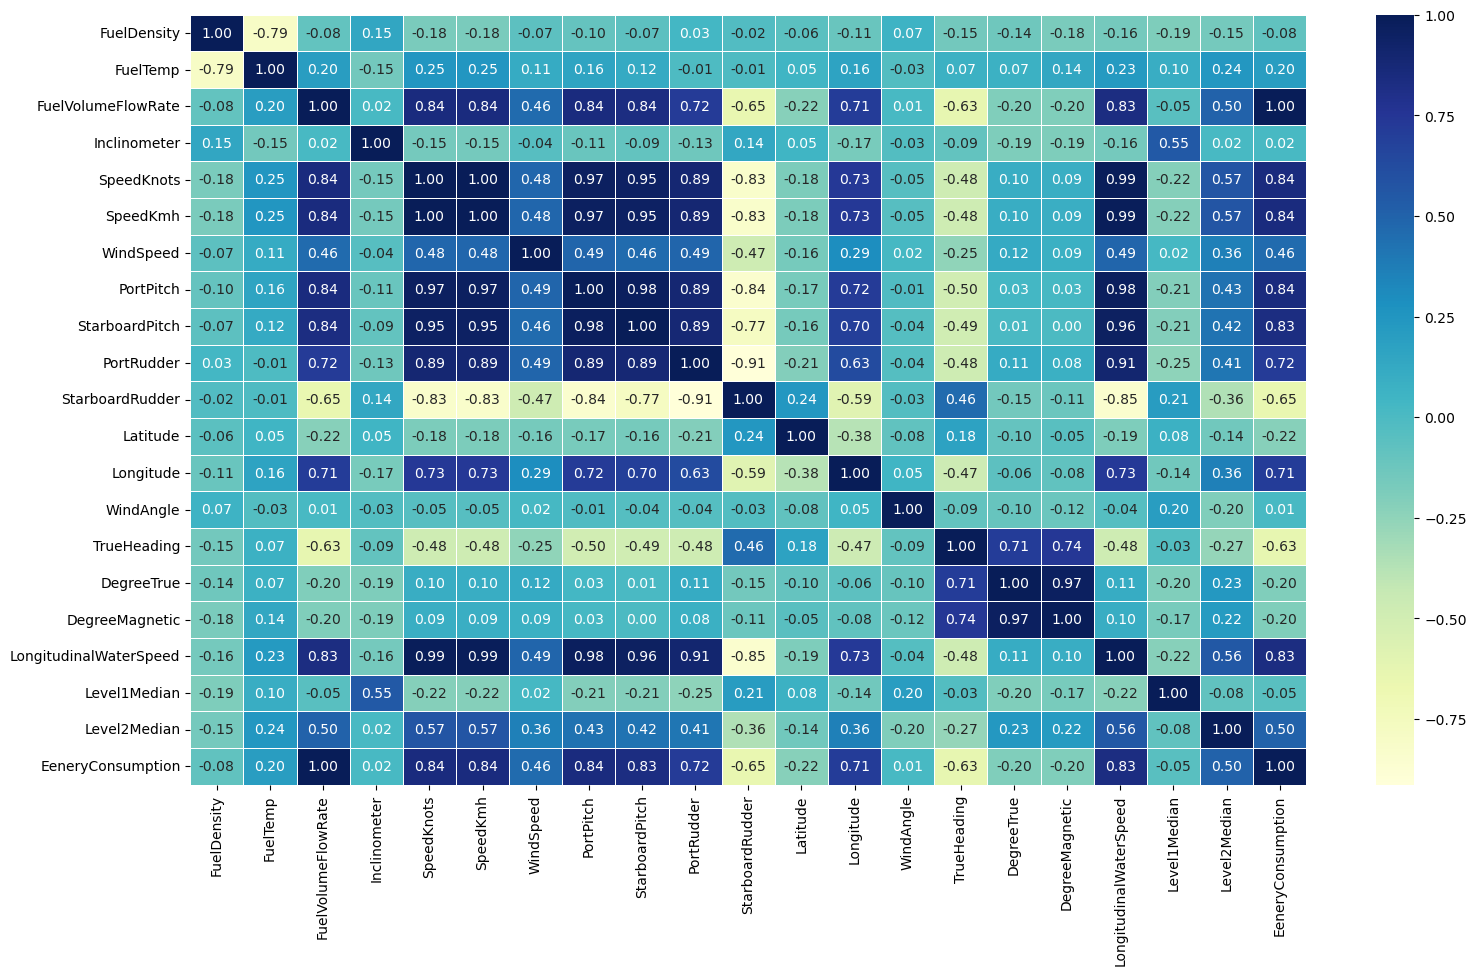

In [79]:
# Correlation matrix using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
 

In [80]:
# Sort by time
df = df.sort_values(by="Timestamp")  

# Remove highly correlated and weakly correlated features  
# SpeedKnots and SpeedKmh are nearly perfectly correlated, so SpeedKnots is removed to avoid multicollinearity.  
# LongitudinalWaterSpeed is also removed due to high correlation with SpeedKmh.  
# Features with an absolute correlation below 0.3 or above 0.90 with EnergyConsumption are excluded.
# NB: fuelVolumeFlowRate and EnergyConsumption are in this category. 
correlation_threshold = 0.3  
high_correlation_threshold = 0.90  
correlation_matrix = df.corr()  

# Identify features weakly or highly correlated with the target  
weakly_correlated_features = correlation_matrix["EeneryConsumption"].abs() < correlation_threshold  
highly_correlated_features = correlation_matrix["EeneryConsumption"].abs() > high_correlation_threshold  

# Combine filtered features  
features_to_remove = weakly_correlated_features | highly_correlated_features  
features_to_remove = features_to_remove[features_to_remove].index.tolist()  
 
features_to_remove.extend(["SpeedKnots", "LongitudinalWaterSpeed"])  

X = df.drop(columns=features_to_remove)  
y = df["EeneryConsumption"]  

# Define 80:20 train-test split index
split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

#### Random Forest

In [81]:
np.random.seed(42)

# Instantiate Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [82]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.0867
MSE: 0.0224
RMSE: 0.1497
R² Score: 0.8673


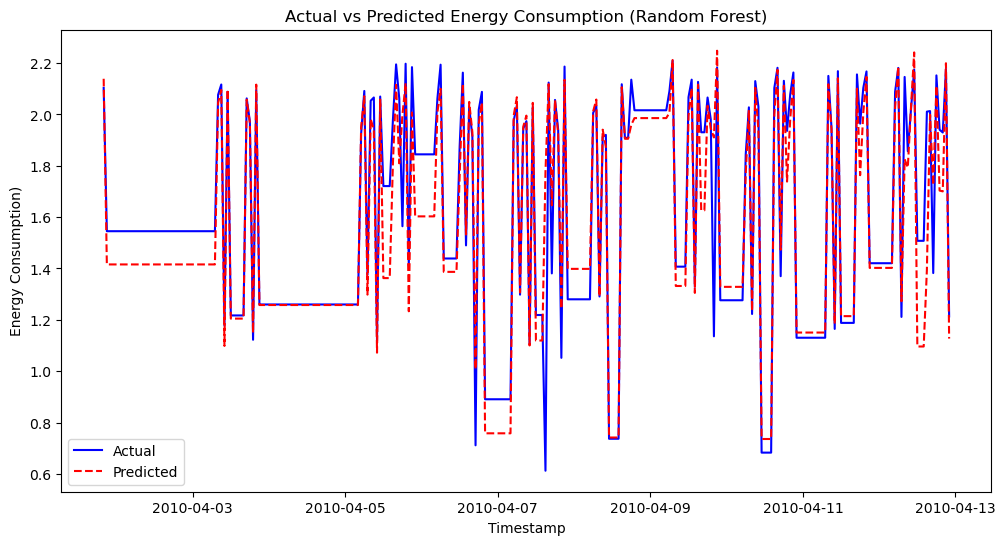

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Timestamp")
plt.ylabel("Energy Consumption)")
plt.title("Actual vs Predicted Energy Consumption (Random Forest)")
plt.legend()

plt.show()



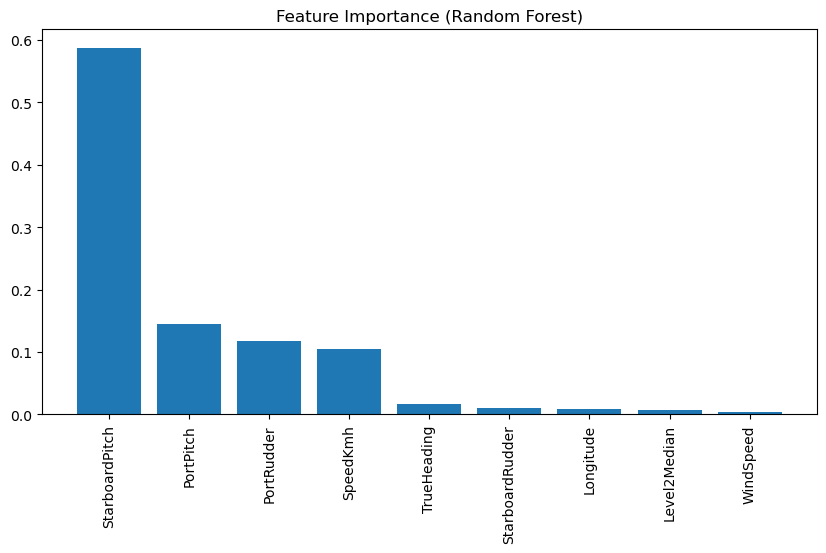

In [84]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title("Feature Importance (Random Forest)")

plt.show()


#### XGBoost

In [85]:
np.random.seed(42)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  
}

# Train model
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)


In [86]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.1100
MSE: 0.0250
RMSE: 0.1582
R² Score: 0.8517


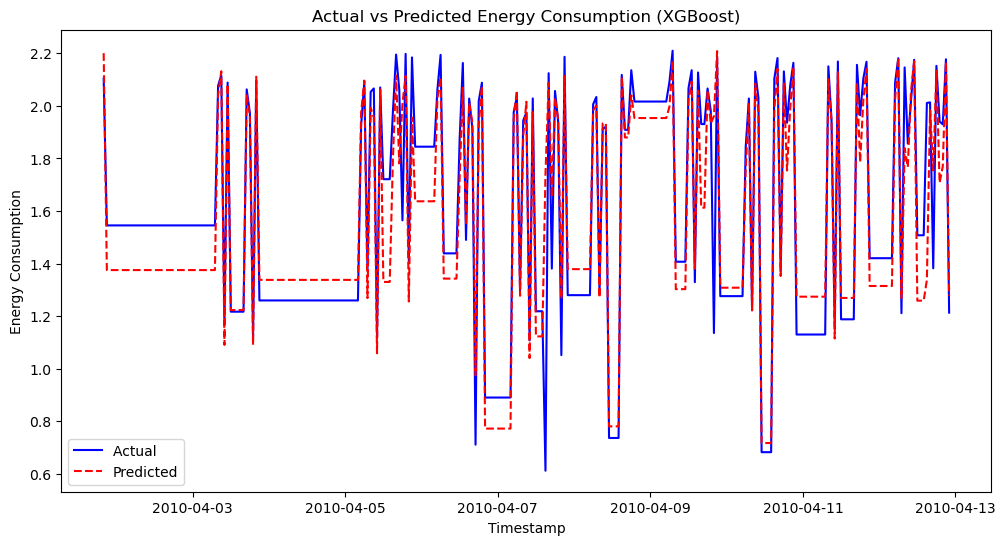

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual ", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Timestamp")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption (XGBoost)")
plt.legend()

plt.show()


##### Performance Comparison 

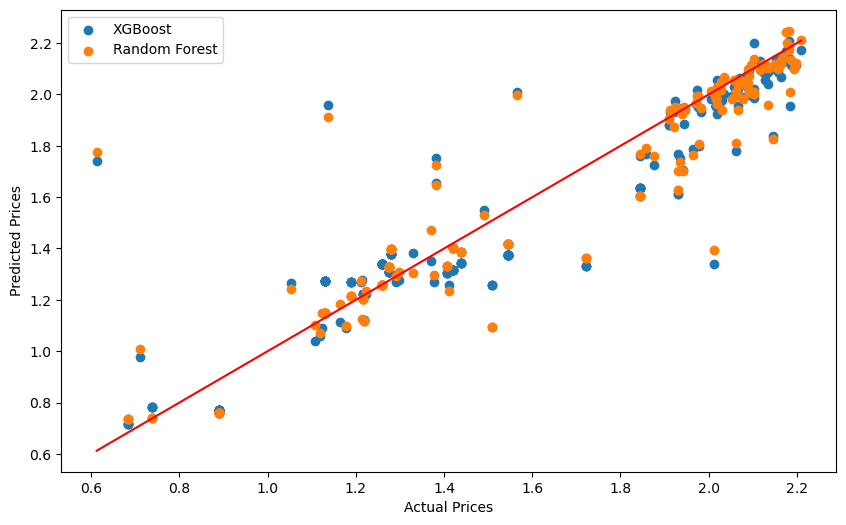

In [88]:
plt.figure(figsize=(10, 6))

y_preds_xgb = xgb_model.predict(X_test)
plt.scatter(y_test, y_preds_xgb, label='XGBoost')

y_preds_rf = rf_model.predict(X_test)
plt.scatter(y_test, y_preds_rf, label='Random Forest')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

plt.show()